## Phase Kickback

In our common world, the effect is always followed by the cause. But in quantum world, **cause** can be followed by **effect**. And this allow designing a handful number of algorithms that can not be run on a classical computer but efficiently run on quantum computer. Consider an example where a light bulb is connected by switch but there are so many other switch. The light bulb is emitting light and all the switches are positioned in on state. The problem is how to determine which switch belongs to the light. Solving it classically, we have to switch off all the switches and then see which one leads the turning off the lightbulb, as cause comes first and then the effect. The maximum number of attempts reach upto the total number of switch. But the phenomena of phase **'kickback'** can allow turning off the the lightbulb and see which switch turned into off state. In this way, we can determine the very switch in one attempt . In quantum computing, phase kickback refers to the fact that controlled operations have effects on their controls, in addition to on their targets, and that these effects correspond to phasing operations. Phase kickback is one of the key effects that distinguishes quantum computation from classical computation and we will compare a classical logic on bits with a quantum logic on qubits to explain this statement.


Consider a XOR gate with two inputs and two outputs as shown in figure below. A XOR operation throw True as the output when both bits are not same and vice-versa. The top wire remain same but the value of bottom wire change according to the top. And no matter which logic gate we use instead of XOR, the phenomena remain the same, that the top wire remain same. But this is merely the story of classical logic gate with bits. 



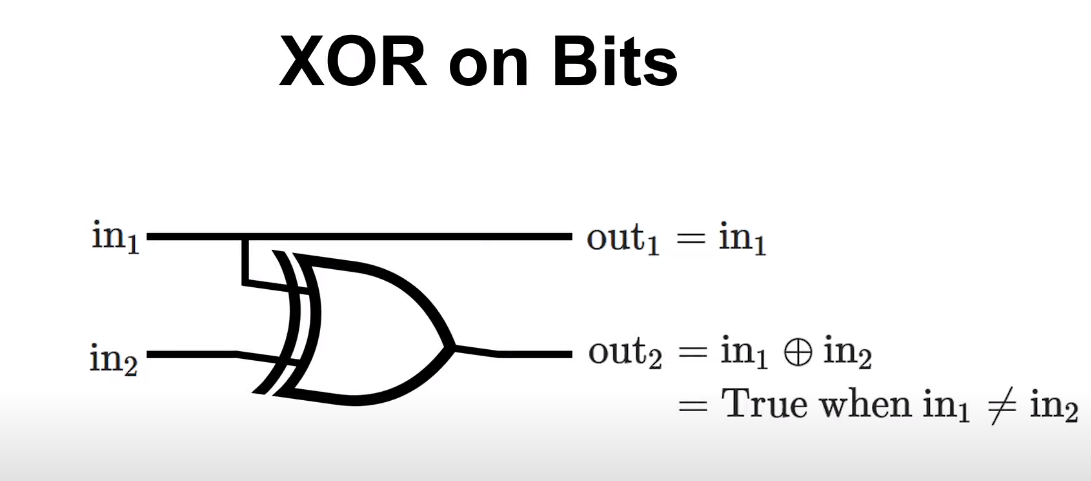


We will see another example with quantum bits-'qubits' applying to quantum logic gate CNOT. The CNOT gate is defined by the following operations:
- If the control qubit is in the state |1⟩, it flips the state of the target qubit.
- If the control qubit is in the state |0⟩, it leaves the target qubit unchanged.

Here’s the circuit representation of this:

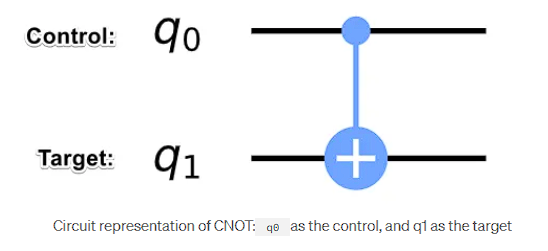


And here’s the CNOT being applied to each computational basis state:

$$|00⟩\rightarrow |00⟩,  |01⟩\rightarrow|01⟩,  |10⟩\rightarrow|11⟩,  |11⟩\rightarrow|10⟩$$

Mathematically speaking, we would say that the amplitudes for the states |10⟩ and |11⟩ were swapped.

But before talking about phase-kickback it is important to understand phase itself. It will take some time to brush up through this but very essential for understanding phase-kickback. 

Consider the qubit |0⟩, then the probabibility of measuring it in computational basis is $⟨0|0⟩$. Now let's say that it is rotated by some angle $\theta$, then it transformed into $e^{i\theta}$|0⟩. Now if we calculate the probability in computational basis,

$|e^{i\theta}|0⟩|^2$ = $(e^{i\theta})$$^*$$e^{i\theta}⟨0|0⟩$ = $(e^{-i\theta})$$e^{i\theta}⟨0|0⟩$ = $⟨0|0⟩$

We saw, phase gave the qubit the extra degree of freedom and the same probability can be expressed in infinite number of rotation as a phase factor, as $\theta$ take infinite number of values. This also demonstrated that phase factor is not an observable quantity, and the phase we considered here is known as global phase. 
 
Phase can be best understand by a property that allow interference effects. Now if we had more than one qubit, then the phase difference of their phase factor gives us the useful phenomena of interference, just like waves do. 

It is important here to state that when the rotation is by $\pi$ radians, then the qubit becomes -|0⟩. If you need the euler identity to understand this, refer: $e^{i\theta}$ = $cos\theta + isin\theta$


Now we show how CNOT gates kickback the phase in the control qubit, when applied to the target.
The circuit we consider here contains Hadamard and PauliX gate along with CNOT gate. Consider the circuit as below containing two qubit q0 and q1, prepared as |01⟩ 

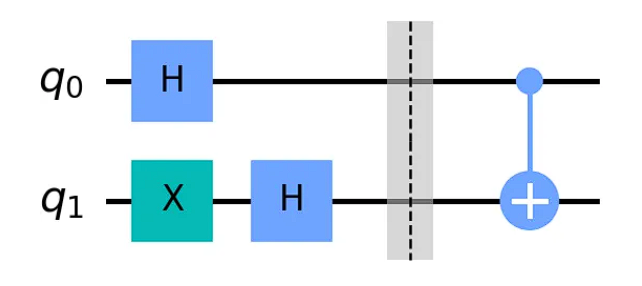

The barrier between the Hadamard’s and the CNOT allows us to examine the quantum state before and after the CNOT. 
If a Hadamard is applied on |0⟩, it creates the superposition and produce $\frac{|0⟩+|1⟩}{\sqrt2}$ also known as |+⟩ and if applied on |1⟩, it produces $\frac{|0⟩-|1⟩}{\sqrt2}$ known as |-⟩ state. Thus the state vector before the barrier can be written as,

$$|+-⟩ = \frac{|0⟩+|1⟩}{\sqrt2}\otimes\frac{|0⟩-|1⟩}{\sqrt2} = \frac{|00⟩-|01⟩+|10⟩-|11⟩}{2}$$ 

Now applying CNOT gate, that evolves the state |01⟩ to |11⟩ and vice versa, we see,

$$CNOT|+-⟩ =CNOT{(\frac{|00⟩-|01⟩+|10⟩-|11⟩}{2})} = \frac{|00⟩-|01⟩+|11⟩-|10⟩}{2} = \frac{|0⟩-|1⟩}{\sqrt2}\otimes\frac{|0⟩-|1⟩}{\sqrt2} = |--⟩$$

Thus applying the CNOT gate on q1 has kicked the relative phase of q1 up to q0. Observe that q0 didn’t have a relative phase before the CNOT, but after applying the gate we can see that it has a relative phase of -1. Now we have both qubits in |-⟩ state after the CNOT is applied. The target qubit, q1 remain unaffected but its phase got shifted or kickbacked to control qubit. If we agin apply Hadamards to the qubits, we would get state |11⟩. Thus the total circuit acted like reversed CNOT gate, when surrounded by Hadamards. 

The explanation of this phenomena is related to superposition, entanglement and interference. The property of having phase allows the qubit to interfere with each other. The CNOT gate create entanglement between the superposition states of |+⟩ and |-⟩ where phase of the control qubit linked to that of target. The interference affects govern how their states evolved and interacted. 

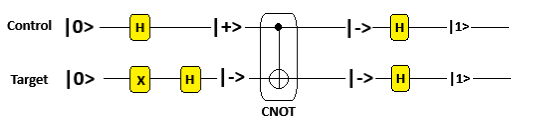




Now we demonstrate the following phenomena using **Classiq IDE** in the following code.



Some basic explanations about the high-level functional design with Classiq:

* There should always be a main (`def main(...)`) function - the model that captures your algortihm is described there

* The model is always generated out of the main function 

* The model is sent to the synthesis engine (compiler) that return a quantum program which contains the quantum circuit


Some basic guidelines about the modeling language (QMOD):

1. Every quantum variable should be declared, either as a parameter of a function e.g. `def prepare_minus(x: QBit)` or within the function itself with `x = QBit('x')`

2. Some quantum variables need to be initalized with the `allocate` function. This is required in 2 cases:
* A variable is a parameter of a function with the declaration `Output` like `def main(x: Output[QInt])`
* A variable that was declared within a function like `a = QInt('a')`

3. For the `main` function, you will always use `Output` for all variables, as the function does not receive any input

Important tip!

You can see all the declarations of the functions with what are their input arguments in the `functions.py` file within the classiq package (or by just right clicking a function and presing `Go To Defintion`)

# Demo of Phase Kickback Using Classiq IDE

In [14]:
# installing the library
!pip install -U classiq
#authenticate your device (one-time); sign up as the classiq user and authorise your device
import classiq
classiq.authenticate()
#importing the required
from classiq import *

In [40]:
@QFunc                                       # @QFunc is the decorator used to initialize quantum program
def main(a:Output[QBit],b:Output[QBit]):     # quantum algorithm is written in 'main'
    allocate(out=a,num_qubits = 1)           # 'allocate' define the qubit name and the number of qubit
    allocate(out=b,num_qubits = 1)
    H(a)                                     # H is the Hadamard Transformation
    X(b)                                     # X is the PauliX gate 
    H(b)
    CX(a, b)                                 # CX is the CNOT gate that takes two parameter
    H(a)
    H(b)

qmodel = create_model(main)                  # 'create_model' render the program in the 'main'
qprogram = synthesize(qmodel)                # 'synthesize' compile the quantum program 
show(qprogram)                               # 'show' produce and visualize the quantum circuit

job = execute(qprogram)                      # 'execute' run the chosen simulator
job.open_in_ide() 


Opening: https://platform.classiq.io/circuit/ac0781b9-8867-4ed3-b96a-6658f6788e5c?version=0.37.0


The link that appeared just after running the previous code cell takes to the quantum program rendered in classiq platform.
The 'model' tab generate the QMOD code and allow changes in the code and the algorithm.
The 'Quantum Program' tab show the circuit and its properties like depth, width, and gate count
The 'Execution' tab allow selection of simulators and show the histogram of state of employed qubits both in probability(shown here in the diagram below) and number of shots. 
Below are the quantum circuit and the result after execution.

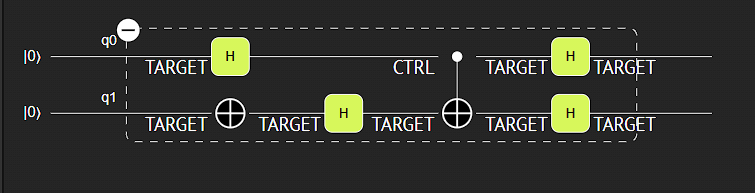 
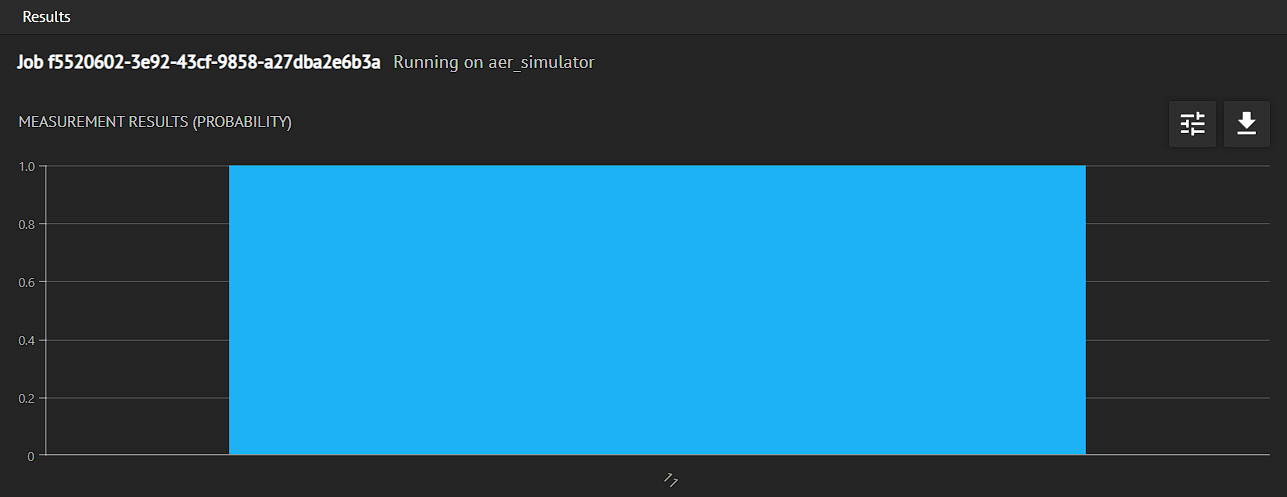




Thus, we see that $|01\rangle$ changed to $|11\rangle$, when CNOT gate is surrounded by Hadamard gates, showing the phase kickback effect. The first qubit shifted back to the state of second qubit. 

## Phase Kickback in Oracle

The Phase Oracle object constructs circuits for any arbitrary input logical expressions. A logical expression is composed of logical operators & (AND), | (OR), ~ (NOT), and ^ (XOR). as well as symbols for literals (variables). In the demo below, we will demonstrate the phase kickback in quantum oracle involving XOR operators.

$$
|x\rangle|y\rangle \xrightarrow{U_f} |x\rangle|y \oplus f(x)\rangle
$$
The phase oracle shifts the phase depends on the value of **f(x)**.

The phase  kickback effect in oracle can be realised for $|x\rangle$ state. 
$$
|x\rangle|-\rangle \xrightarrow{U_f} (-1)^{f(x)}|x\rangle|-\rangle
$$

Before proceeding further, it is important to see it mathematically. We start with a state $|x\rangle|-\rangle$ on which oracle $U_f$ is defined. Let's call it $\psi$. 

$$\psi = U_f|x\rangle|-\rangle = \frac{U_f}{\sqrt2}(|x\rangle|0\rangle-|x\rangle|1\rangle)$$

$$\psi = \frac{1}{\sqrt2}(U_f|x\rangle|0\rangle-U_f|x\rangle|1\rangle)$$

Implementing $U_f$,

$$\psi = \frac{1}{\sqrt2}(|x\rangle|0\oplus f(x)\rangle-|x\rangle|1\oplus f(x)\rangle)$$

Considering the property of XOR,

$$\psi = \frac{1}{\sqrt2}(|x\rangle|f(x)\rangle-|x\rangle|\overline{f(x)}\rangle)$$

If **f(x) = 0**, $\psi = |x\rangle|-\rangle$

and if **f(x) = 1**, $\psi = -|x\rangle|-\rangle$

Now we follow the steps to realise the phase kickback event in quantum oracle. 

First we need to prepare the $|-⟩$ state. A minus state is prepared by applying a hadamard transformation to $|1⟩$ state. we will get $|1⟩$ state by applying a NOT gate or PauliX gate to prepared $|0⟩$ state. 

$$X|0⟩ \rightarrow |1⟩, H|1⟩ \rightarrow |-⟩$$

In [15]:
@QFunc
def prepare_minus(x:Output[QBit]):
    allocate(out=x,num_qubits=1)
    X(x)
    H(x)

Then we need to define the oracle function that implements,
$$U_f|x⟩|y⟩=|x⟩(|y⟩ \oplus f(x))
\text {  for  }
f(x) = (x==0) 
$$

The equation says that if x = 0, then f(x) = 1 as, x==0 returns True or non-zero and vice-versa.

The operator **^** is notation for XOR. The quantum function `oracle_func` takes quantum bit *aux* and quantum number *x* as parameter, and re-assign ***aux*** as ***aux^(x==0).***

In [16]:
@QFunc
def oracle_func(aux:QBit,x: QNum):
    aux^= x==0

Now we apply the phase kickback with Classiq's `within_apply(A,B)` operation that applies $ABA^{\dagger}$. `within_apply(A,B)` is a second order quantum functions(takes other quantum functions as the arguments). It takes two function arguments `compute` and `action`, and invokes the sequence `compute()`, `action()` and `invert(compute())` as lambda functions. Here we need to calculate $⟨-|U_f|-⟩$, thus `prepare_minus` is passed as *compute* and `oracle_func` as *action*.

In [17]:
@QFunc
def oracle_phase_kickback(x:QNum):
    aux = QBit('aux')
    within_apply(compute = lambda:prepare_minus(aux),action=lambda: oracle_func(aux,x))


Putting everything together, we create a `main` function that takes x[QNum] as argument. The oracle phase-kickback is demonstrated using 4+1 qubits. The fifth qubits is the ancilla qubit that we just need for the phase kickback operation. Now we use the **Classiq's** inbuilt method to allocate the QNum using `allocate_num`. It is used for encoding of numbers in computational-basis with specific numeric interpretation, that allow signed integer and fraction digits. The next is to apply Hadamard transformation to all the 4 assigned qubits to create the superposition, and this can be done using simply by `hadamard_transform()`, without using loops. It is not necessary to mention that how so much redundancy can be skipped using **Classiq SDK**. The last is to call `oracle_phase_kickback()` that apply the pattern $ABA^{\dagger}$ with A as `prepare_minus`, B as `oracle_func` and *aux* as the argument. And we again apply the `hadamard_transform()` to the first 4 qubits to revert the transformation imposed by the first Hadamard transformation.

As mentioned in previous demo of Phase Kickback, the Classiq provide the platform where the quantum program is rendered as in a model tab when `create_model()` is executed with `main` as the argument. The model is then passed to Synthesis Engine(compiler) using `synthesize(model)` that return the quantum program with quantum circuit. The circuit can be visualised using `show(program)`.

In [22]:
@QFunc
def main(x:Output[QNum]):
    allocate_num(num_qubits=4,is_signed=False,fraction_digits=0,out=x)
    hadamard_transform(x)
    oracle_phase_kickback(x)
    hadamard_transform(x)

qmodel = create_model(main)
qprogram = synthesize(qmodel)
show(qprogram)


Opening: https://platform.classiq.io/circuit/e099af5a-89a9-4547-b4b0-a5a00e14bbd3?version=0.37.0


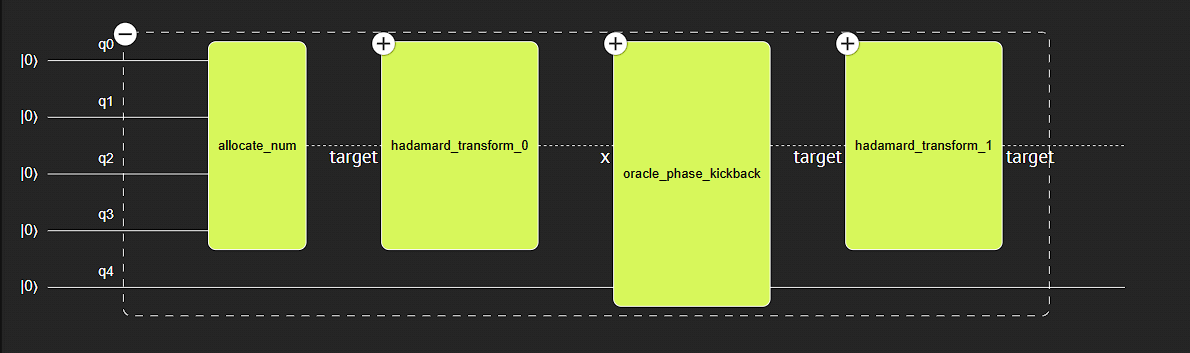




Classiq also provide the state vector simulation in the IDE to view that we got what we wanted. The simulation job is done using `execute(program)` and opened in the IDE using `.open_in_ide()`. Various parameters can be added to the `execute` such as the simulators used, number of shots, error tolerance and error mitigation, running time, etc. depending on the job. 

In [26]:
job = execute(qprogram)                      
job.open_in_ide() 

The histogram of the probability distributionn appears in the **job** tab of **Classiq IDE**. Using the below code, the probability distribution can also be tabulated as below. 

In [24]:
results = job.result()
parsed_counts = results[0].value.parsed_counts
sorted_counts = sorted(parsed_counts, key=lambda x: x.state["x"])
for state_counts in sorted_counts: print('State: ', state_counts.state, '| Shots: ', state_counts.shots)

State:  {'x': 0.0} | Shots:  1570
State:  {'x': 1.0} | Shots:  30
State:  {'x': 2.0} | Shots:  21
State:  {'x': 3.0} | Shots:  33
State:  {'x': 4.0} | Shots:  37
State:  {'x': 5.0} | Shots:  29
State:  {'x': 6.0} | Shots:  25
State:  {'x': 7.0} | Shots:  36
State:  {'x': 8.0} | Shots:  37
State:  {'x': 9.0} | Shots:  31
State:  {'x': 10.0} | Shots:  26
State:  {'x': 11.0} | Shots:  40
State:  {'x': 12.0} | Shots:  31
State:  {'x': 13.0} | Shots:  37
State:  {'x': 14.0} | Shots:  31
State:  {'x': 15.0} | Shots:  34


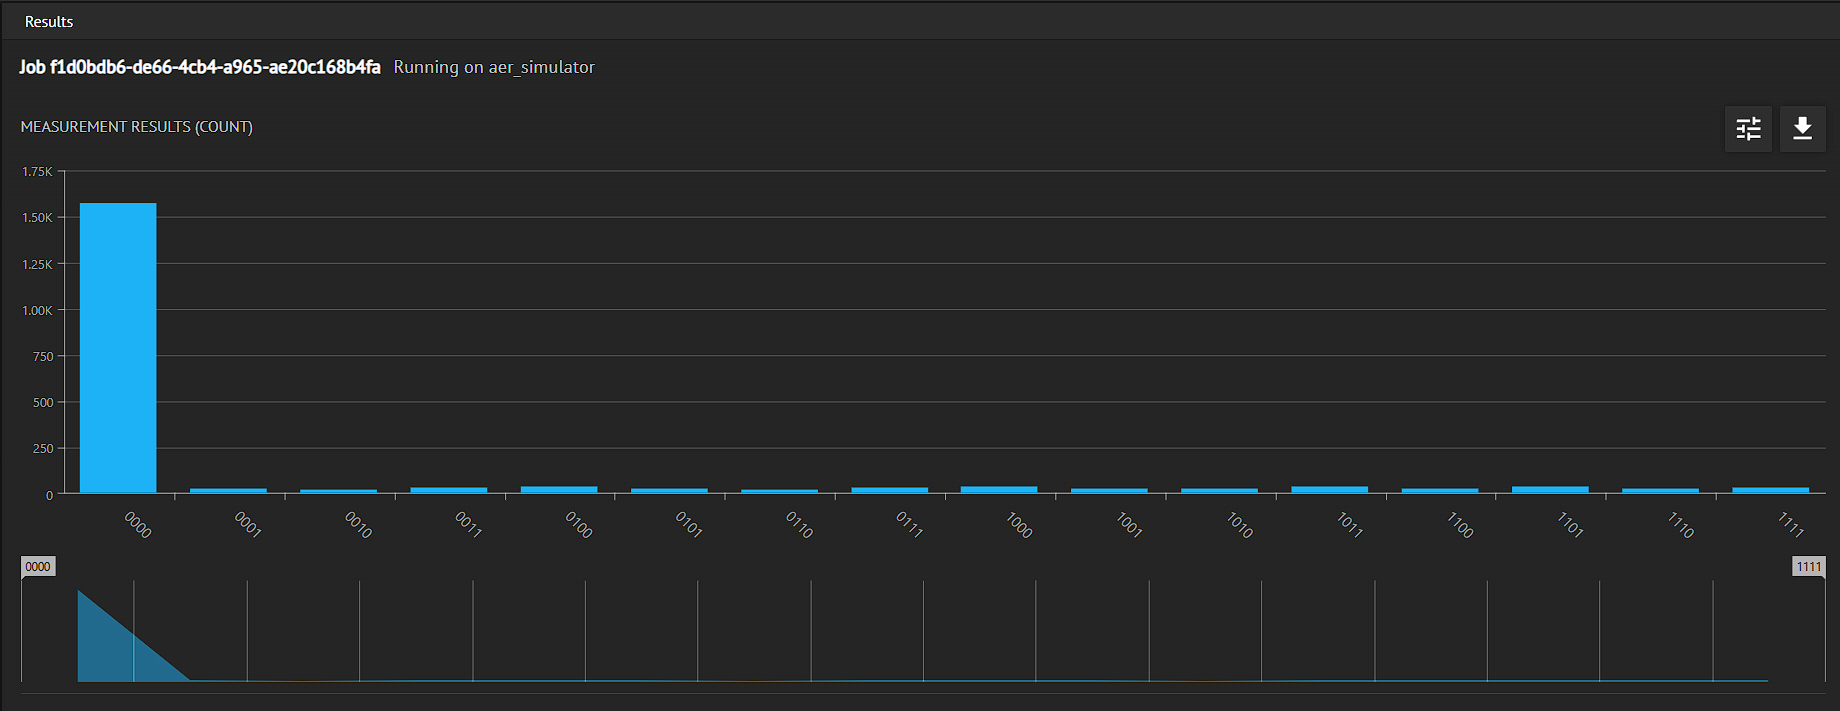

Interpreting the result, we can see that the state $|0000\rangle$ is returned 76.6 % (1570/2048) times, effect of  the error in the simulation of the algorithm. On a complete error free simulator, it would be 2048 (100%), the total number of shots. 

Thus, in this demo, we saw the phase kickback effect both in general and in quantum oracles. We also saw how **Classiq** tools and IDE makes it very easy to apply, as it provide a bunch of inbuilt methods and functions for prominent algorithms like these. Also, it can be modified on the demand of the user, as the tools are super-flexible to use.  